# Classification Model with Affairs Data



<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Machine Learning Project Template</h1>
</div>

Just learning the concepts and theory is not sufficient to ace in machine learning. You need to implement the concepts and try to solve more practical problems.

In this notebook, you will learn how to implement machine learning. You will be able to kickstart your project using this template

### Content:
1. Load the Data
  - Import libraries
  - Load the datasets

2. Overview of the Data
  - Descriptive Statistics
  - Missing Values

3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class

4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split

5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation

7. Improve Model
  - Handle Class Imbalance
  - Save the Final Model

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [2]:
# Import libraries

# Data Manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [3]:
# Define the file name
file_name = "/content/sample_data/Affairs.csv"

# Read data in form of a csv file
df = pd.read_csv(file_name)

# First 5 rows of the dataset
df.head()

,cheat,id,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,4,0,male,37.0,10.00,no,3,18,7,4
1,0,5,0,female,27.0,4.00,no,4,14,6,4
2,0,11,0,female,32.0,15.00,yes,1,12,1,4
3,0,16,0,male,57.0,15.00,yes,5,18,6,5
4,0,23,0,male,22.0,0.75,no,2,17,6,3


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode
- Min, max
- Count etc

Let's understand the data we have

In [4]:
# Dimension of the data
df.shape

(601, 11)

In [5]:
# Summary of the dataset
df.describe()

,cheat,id,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,0.433133,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,0.000000,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,1.000000,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [6]:
# Missing values for every column
df.isna().sum()

cheat            0
id               0
affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [8]:
# Remove extra columns
col_remove = ['id']
df = df.drop(col_remove, axis = 1)

In [9]:
# List of numeric and categorical columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Binary Columns : ", binary_columns)

categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical Columns : ", categorical_columns)

categorical_columns = binary_columns + categorical_columns
categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in df.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['cheat', 'gender', 'children']
Categorical Columns :  ['gender', 'children']
Numerical Columns :  ['affairs', 'age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

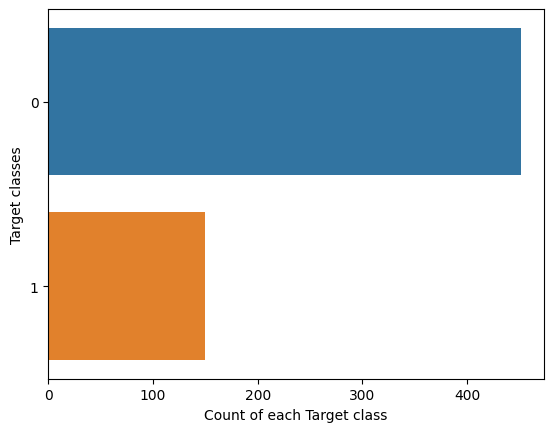

In [10]:
# Target class
target_class = "cheat"

# Check distribution of target class
sns.countplot(y=df[target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.3. Check the distribution of every feature

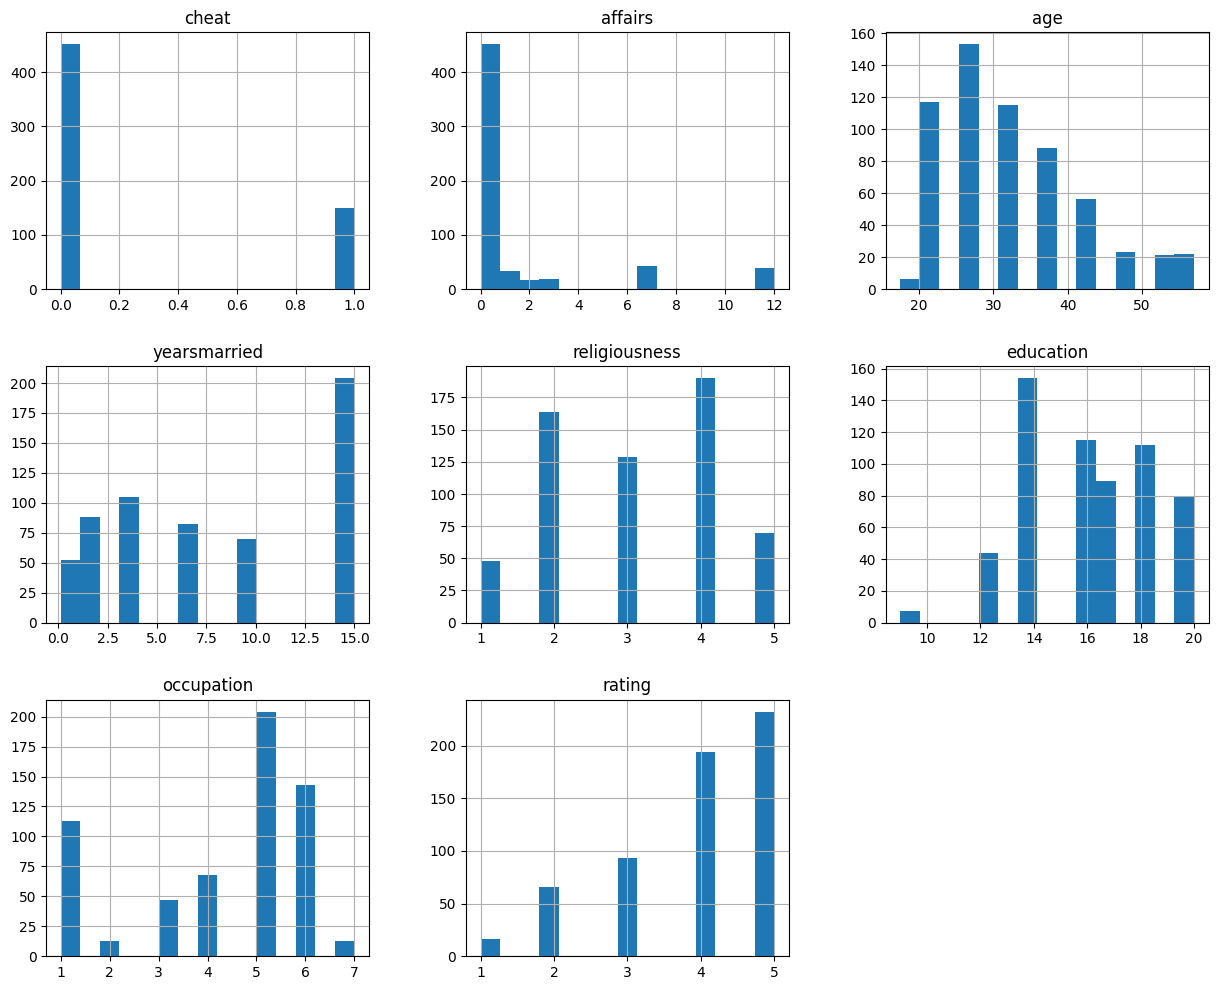

In [11]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [12]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

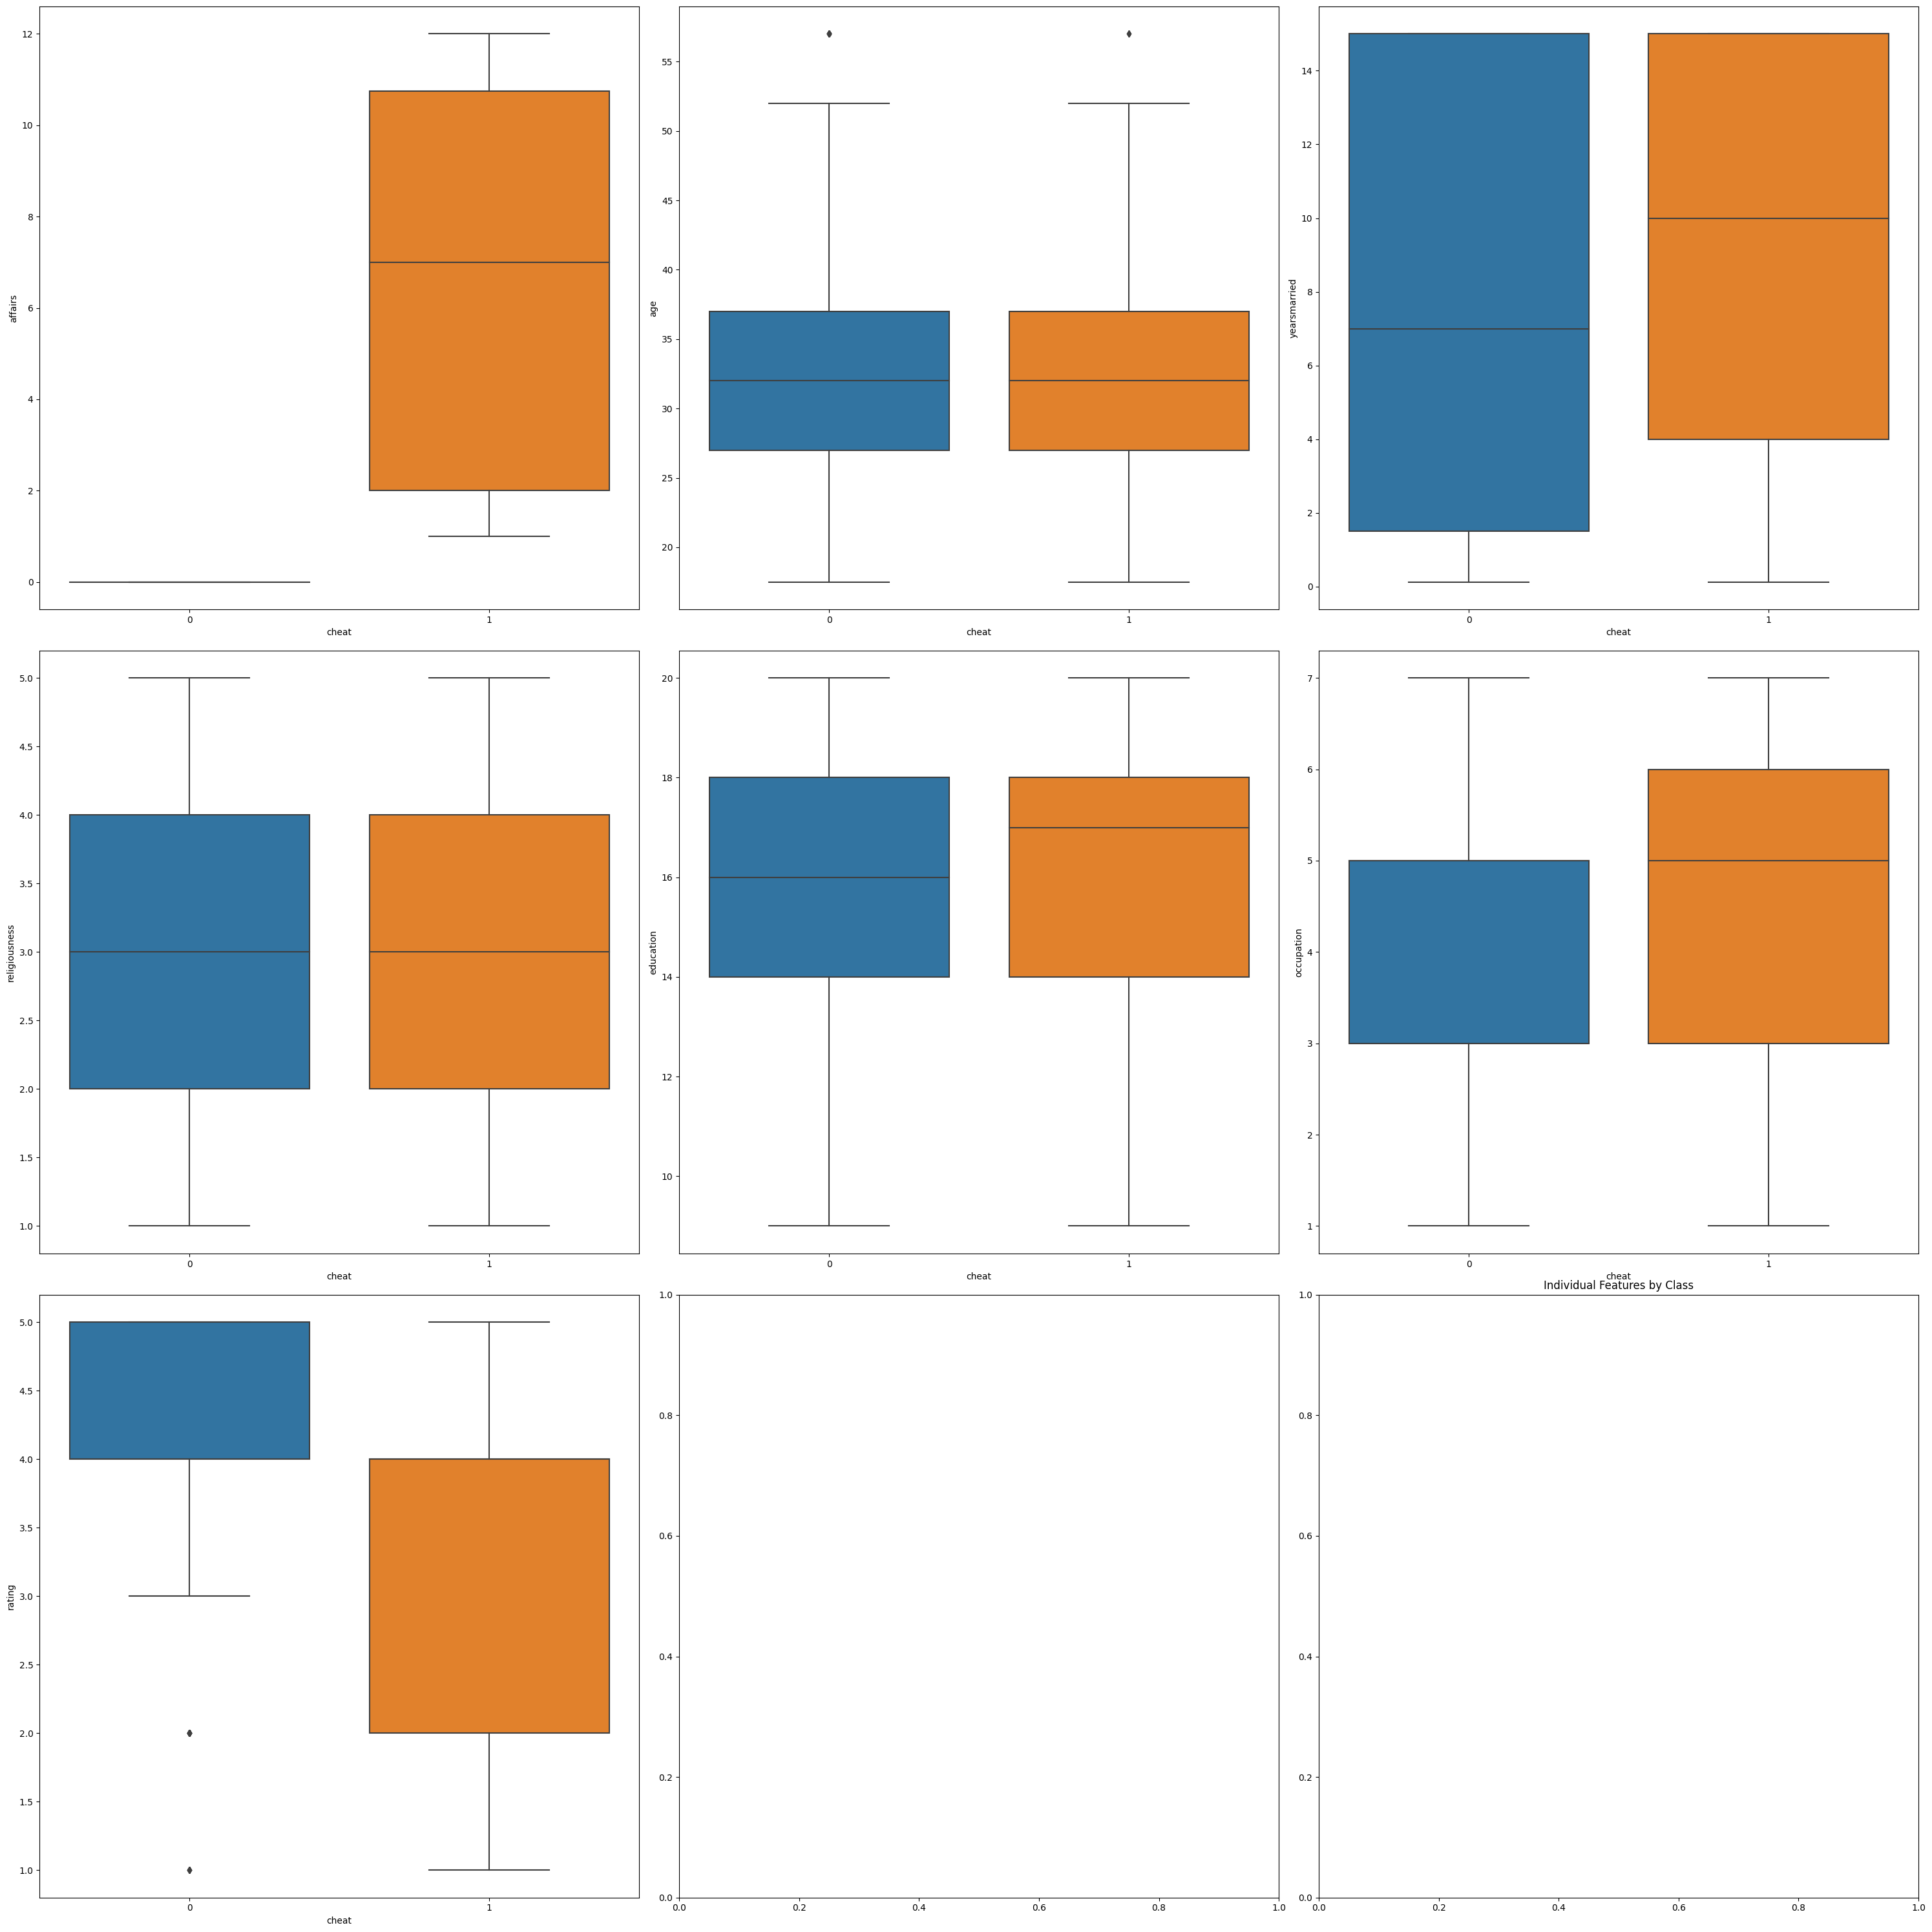

In [13]:
# Check the distribution of y variable corresponding to every x variable
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df[target_class], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model

Here you will impute the missing values with mean

In [ ]:
# Impute missing values
df = df.fillna(df.mean())

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

In [14]:
# Label encode the variables
for col in categorical_columns:
    lbl     = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(list(df[col].values))

df.head()

,cheat,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,0,27.0,4.00,0,4,14,6,4
2,0,0,0,32.0,15.00,1,1,12,1,4
3,0,0,1,57.0,15.00,1,5,18,6,5
4,0,0,1,22.0,0.75,0,2,17,6,3


### 4.3. Split X and y

Split the X and y dataset

In [15]:
# Split the y variable series and x variables dataset
X = df.drop([target_class, 'affairs'],axis=1)
y = df[target_class]

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [16]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):

    scaler = StandardScaler()

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns

    return scaled_data

In [17]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,1.049475,0.486205,0.327360,-1.585755,-0.099845,0.763828,1.543144,0.061891
1,-0.952857,-0.591262,-0.750484,-1.585755,0.757393,-0.902454,0.993067,0.061891
2,-0.952857,-0.052529,1.225564,0.630614,-1.814320,-1.735594,-1.757317,0.061891
3,1.049475,2.641138,1.225564,0.630614,1.614631,0.763828,0.993067,0.969116
4,1.049475,-1.129995,-1.334317,-1.585755,-0.957082,0.347257,0.993067,-0.845335


### 4.5 Train - Test Split

Split the dataset in training and test set

In [18]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the logistic regression model on training data

In [19]:
# Defining the model
model = LogisticRegression(random_state=0)
# model = DecisionTreeClassifier(random_state=0)

# Training the model:
model.fit(X_train, y_train)

model

LogisticRegression(random_state=0)

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [20]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Y probability predicted :  [0.25009201421489186, 0.09259533357449215, 0.11411307251042492, 0.23494006869389478, 0.21574638779986927]


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [21]:
# Define a function to compute various evaluation metrics
def compute_evaluation_metric(y_actual, y_predicted):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

In [22]:
# Compute Evaluation Metric
compute_evaluation_metric(y_test, y_pred)


 Accuracy Score : 
  0.7624309392265194

 Confusion Matrix : 
  [[131   8]
 [ 35   7]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       139
           1       0.47      0.17      0.25        42

    accuracy                           0.76       181
   macro avg       0.63      0.55      0.55       181
weighted avg       0.71      0.76      0.72       181



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model.

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results.

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [24]:
# Over sample the minority class
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()

0    451
1    451
Name: cheat, dtype: int64

In [25]:
# Define the function to build model on balanced dataset
def classification_model(X, y):

    scaled_X = scale_data(X)

    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Defining the model
    model = LogisticRegression(random_state=0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)

    # Compute Evaluation Metric
    compute_evaluation_metric(y_test, y_pred)

    return model

In [26]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)


 Accuracy Score : 
  0.6642066420664207

 Confusion Matrix : 
  [[82 48]
 [43 98]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.63      0.64       130
           1       0.67      0.70      0.68       141

    accuracy                           0.66       271
   macro avg       0.66      0.66      0.66       271
weighted avg       0.66      0.66      0.66       271



# Using Random Forest For Prediction

In [32]:
# Split the dataset into the training set and test set
scaled_X = scale_data(X_ros)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_ros, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8376383763837638

In [36]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.8376383763837638
[[ 96  34]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       130
           1       0.79      0.93      0.86       141

    accuracy                           0.84       271
   macro avg       0.85      0.83      0.83       271
weighted avg       0.85      0.84      0.84       271



In [34]:
# Most inflential attributes or variable
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
age,0.174028
education,0.160531
religiousness,0.154446
yearsmarried,0.148875
rating,0.142383
occupation,0.134922
gender,0.043826
children,0.040989


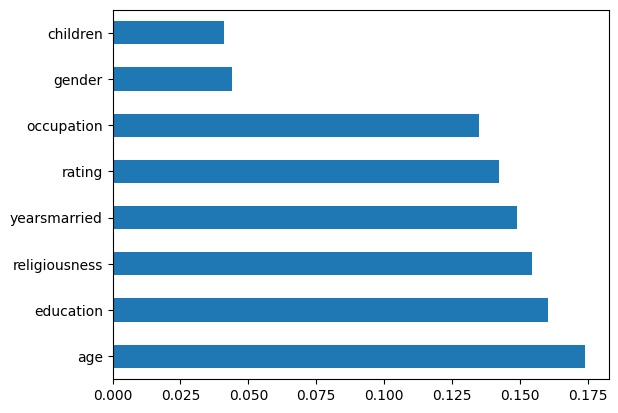

In [35]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh',
                                                                                                            legend=None);

### 6.2 Save the final model

You can save the model in local disk and use it whenever you want

In [ ]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<div class="alert" style="background-color:#696969; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:15px 15px; font-size:12px'> All Rights Reserved. This notebook is proprietary content of machinelearningplus.com. This can be shared solely for educational purposes, with due credits to machinelearningplus.com</h3>
</div>

